# Example: Solving an Ordinary Differential Equation in Python
In this notebook, we numerically solve the following SIS model using Python. 
\begin{align}
\frac{dS}{dt}&=-\beta S I + \alpha I\\
\frac{dI}{dt}&=\beta S I - \alpha  I\\
\end{align}
with the initial conditions $S(0)=S_0,~I(0)=I_0$.


Later, you will add some additional cells to this notebook to numerically solve the following SIR model.
\begin{align}
\frac{dS}{dt}&=-\beta S I \\
\frac{dI}{dt}&=\beta S I - \alpha  I\\
\frac{dR}{dt}&= \alpha I 
\end{align}
with the initial conditions $S(0)=S_0,~I(0)=I_0,~R(0)=R_0$.




To solve the ODE numerically and plot its solutions, we need to load to Python modules.  We do this using 'import'. When we write, for example, 'import numpy as np', this means we are importing the module called 'numpy', but we will be able to access its functions, etc., using the shorthand 'np'.  For example, if I want to create a numpy array, I can write np.array instead of numpy.array.

*Task 1: Look up the following modules to get an idea for what they will be used for.

In [1]:
import numpy as np
import sympy as sm

import scipy as sp
from scipy.integrate import solve_ivp

import matplotlib as mp
import matplotlib.pyplot as plt

%matplotlib inline
# enable pretty printing of equations
sm.init_printing()

First, we need to create a function that solves our ODE for a given set of parameters.  In the following cell, we define a function that computes the derivatives dS/dt and dI/dt that define the SIR model. The Python function 'def' is used to define your own functions.

In [2]:
# Define model equations in function dydt.  
# It returns, as an array, the values of the RHS of the ODE at (t,y).
def dydt(t, y, par):
            
    alpha = par[0]
    beta  = par[1]

    S = y[0]
    I = y[1]
    R = y[2]
    
    dS =  -beta*S*I 
    dI = beta*S*I - alpha*I
    dR = alpha*I
    
    return np.array([dS,dI,dR])

In the following cell, we define a function 'SolveModel' that numerically solves the model.
The inputs to this function are:
1. array of parameter values, par.
2. range over which to compute the solution, tspan.
3. array of intial conditions, init_cond
4. array of timepoints at which to output the solution.

The function returns the solution to the ODE, which is numerically computed using the function 'solve_ivp'.

In [3]:
def SolveModel(par,tspan,init_cond,t_eval):
    
    ode_soln = solve_ivp(dydt,
                         tspan,
                         init_cond,
                         t_eval = t_eval,
                         args = (par,))
    return ode_soln

To numerically compute the solution to our ODE, we need to set numeric values to the initial conditions and the model parameters.

In [4]:
# Define parameters
beta = np.array ([0.0018, 0.0021, 0.0019, 0.0027, 0.0029, 0.0020, 0.0016, 0.0015, 0.0023, 0.0030])
alpha = 0.476
par = [alpha,beta]
    
# Define initial conditions
N0 = 763
I0 = 25
R0 = 0
S0 = N0 - I0 - R0
init_cond = np.array([S0, I0, R0])
tspan = (3,50)    
t_eval = np.linspace(3., 50., 100)

In [8]:
par, par[1]

([0.476,
  array([0.0018, 0.0021, 0.0019, 0.0027, 0.0029, 0.002 , 0.0016, 0.0015,
         0.0023, 0.003 ])],
 array([0.0018, 0.0021, 0.0019, 0.0027, 0.0029, 0.002 , 0.0016, 0.0015,
        0.0023, 0.003 ]))

Now, we're ready to numerically solve our system of ODEs using the initial data and parameter values defined in the previous cell. The output of SolveModel is called a 'bunch object'.  The object's contents, which are the output times 't' and an array 'y' of the numerical solution at each time (each column of this array corresponds to a different state variable, in our case, $S$ and $I$). These outputs are "dot-accessible"; that is, they can be accessed using soln.t and soln.y as shown below. 

In [11]:
for i in par[1]:
    print(i)
    params = [par[0],i]
    soln = SolveModel(params,tspan,init_cond,t_eval)
    t = soln.t
    S = soln.y[0]
    I = soln.y[1]
    R = soln.y[2]

0.0018
0.0021
0.0019
0.0027
0.0029
0.002
0.0016
0.0015
0.0023
0.003


We can now plot the solutions to the SIR model.

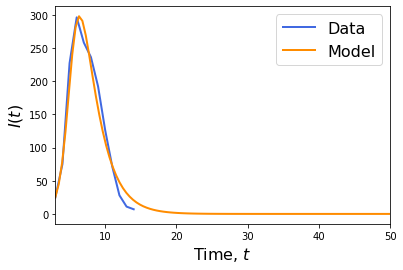

In [9]:
plt.plot(t, I, c='darkorange',  linewidth=2,)
plt.legend(fontsize=16)
    
xmin = t[0]
xmax = t[-1]
plt.xlim(xmin, xmax)
    
xmin = t[0]
xmax = t[-1]
plt.xlim(xmin, xmax)
    
plt.xlabel("Time, $t$", fontsize=16)
plt.ylabel("$I(t)$",fontsize=16)

# NOTE: if you want to save a figure, you can do so as follows.
plt.savefig('SIRplot_test.png')

In [42]:
Itest = np.zeros((3,2))
Itest[:,0] = np.array([1,2,3])
Itest
# Itest2 = np.append(Itest,np.transpose(np.array([1,2,3]),axis=1))
# Itest2
# Itest = np.append()

array([[1., 0.],
       [2., 0.],
       [3., 0.]])

In [22]:
I1 = np.transpose(np.array([1,3,2]))

In [25]:
I_array = np.append(I_array,I1,1)

AxisError: axis 1 is out of bounds for array of dimension 1

In [24]:
np.append(I_array,I1)

array([1., 3., 2., 1., 3., 2., 1., 3., 2.])